### We are going to analyse the Employee dataset and predict the employee's salary based on certain factors

# About the dataset

###### This Employee dataset has four features using which we will predict the target variable called "Salary".
Using features such as Group, Age, Healthy eating and active lifestyle the employees salary are evaluated. 

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bubbly.bubbly import bubbleplot
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"F:\Vasanthi\Downloads\Project dataset\archive\employee_data.csv")

In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'groups', 'age', 'healthy_eating',
       'active_lifestyle', 'salary'],
      dtype='object')

In [8]:
data

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
...,...,...,...,...,...,...,...
995,995,995,O,33,7,7,2996
996,996,996,O,21,1,2,667
997,997,997,O,49,9,7,4158
998,998,998,AB,56,6,7,2414


Since Unnamed and ID is not going to make any sense in our model we will drop those columns

In [15]:
data=data.drop(["Unnamed: 0","id"], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   id                1000 non-null   int64 
 2   groups            1000 non-null   object
 3   age               1000 non-null   int64 
 4   healthy_eating    1000 non-null   int64 
 5   active_lifestyle  1000 non-null   int64 
 6   salary            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [16]:
data

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574
...,...,...,...,...,...
995,O,33,7,7,2996
996,O,21,1,2,667
997,O,49,9,7,4158
998,AB,56,6,7,2414


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   groups            1000 non-null   object
 1   age               1000 non-null   int64 
 2   healthy_eating    1000 non-null   int64 
 3   active_lifestyle  1000 non-null   int64 
 4   salary            1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


### There are no missing values in the dataset

In [18]:
data.describe()

,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.155000,4.944000,5.683000,2227.46100
std,13.462995,2.013186,2.048587,1080.20976
min,18.000000,0.000000,0.000000,553.00000
25%,30.000000,4.000000,4.000000,1360.00000
50%,41.000000,5.000000,6.000000,2174.00000
75%,53.000000,6.000000,7.000000,2993.75000
max,64.000000,10.000000,10.000000,5550.00000


#### Let's do some exploratory data analysis in our dataset

##### We will first check the normality of our target variable

<AxesSubplot:xlabel='salary', ylabel='Density'>

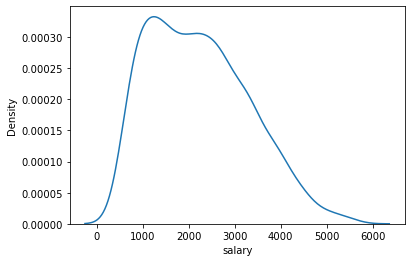

In [38]:
sns.kdeplot(x=data.salary, data=data, palette= "Pastel")

In [33]:
print("Healthy eating: \n ", data.healthy_eating.value_counts())
print("Active lifestyle: \n ", data.active_lifestyle.value_counts(ascending=True))

Healthy eating: 
  5     179
6     176
4     173
3     138
7     116
8      73
2      71
9      26
1      25
0      14
10      9
Name: healthy_eating, dtype: int64
Active lifestyle: 
  0       7
10     15
1      26
2      34
9      64
3      92
4     104
8     114
7     163
5     168
6     213
Name: active_lifestyle, dtype: int64


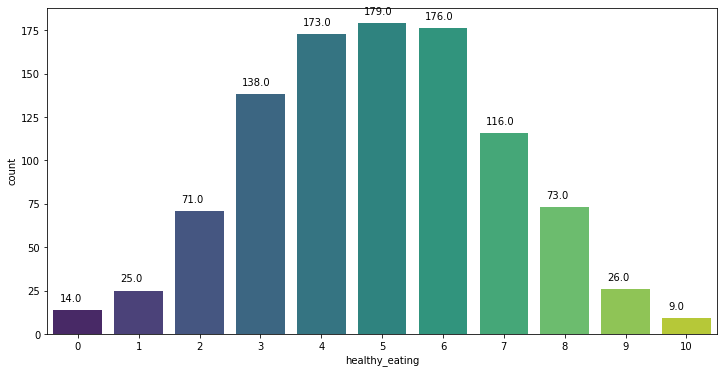

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=data.healthy_eating, data=data, palette="viridis",ax=ax);
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+5))

0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Length: 1000, dtype: int64

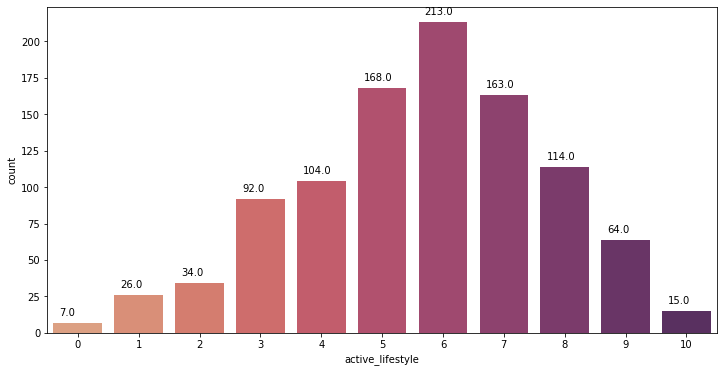

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=data.active_lifestyle, data=data, palette="flare",ax=ax);
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+5))

<AxesSubplot:xlabel='active_lifestyle', ylabel='Density'>

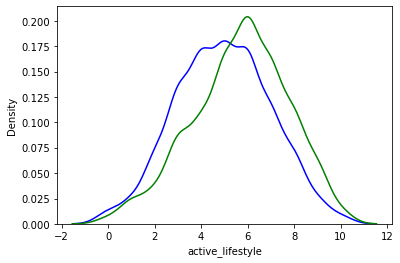

In [59]:
sns.distplot(data.healthy_eating,color="b",hist=False, label='Healthy eating')
sns.distplot(data.active_lifestyle,hist=False,color='green', label='Active lifestyle')

The average people eating healthy and to that of people leading an active lifestyle is almost similar. From which we can understand that active lifestyle comes from healthy eating.

#### Now let's see what we can find from age and their eating choice and how they influence their activity and how the salary is decided??

In [86]:
fig = px.scatter(data, x=data.salary, y=data.healthy_eating,size=data.salary, color=data.age,
                 hover_name=data.salary, log_x=True, size_max=50)
fig.show()

* when we hover around the bubble plot we can find the people from a particular age and their respected healthy eating and salary. The more the people eat healthy the more salary they recieve.

In [89]:
fig = px.scatter(data, x=data.salary, y=data.active_lifestyle,size=data.salary, color=data.age,
                 hover_name=data.salary, log_x=True, size_max=50)
fig.show()

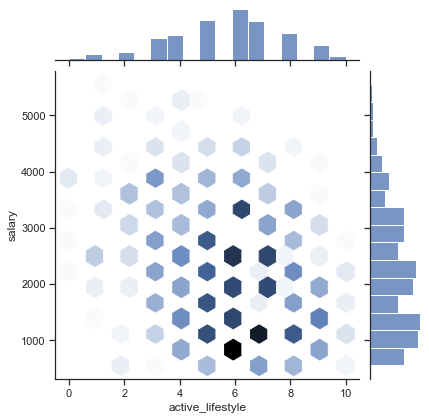

In [129]:
sns.set_theme(style="ticks")
sns.jointplot(x=data.active_lifestyle, y=data.salary,kind="hex")
fig.show()

* People who get low salary has high active lifestyle

#### How Blood group is related to other features? Will it influence the salary?? 

In [159]:
data.groups.value_counts()

A     375
O     375
AB    125
B     125
Name: groups, dtype: int64

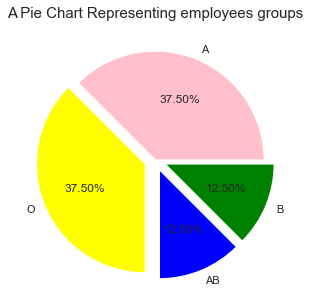

In [163]:
size = [375,375,125,125]
labels = "A", "O","AB","B"
colors = ['pink', 'yellow',"blue","green"]
explode = [0, 0.1,0.1,0.1]

plt.subplots(figsize=(5,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = False, autopct = "%.2f%%")
plt.title('A Pie Chart Representing employees groups', fontsize = 15)
plt.axis('on')
plt.show()

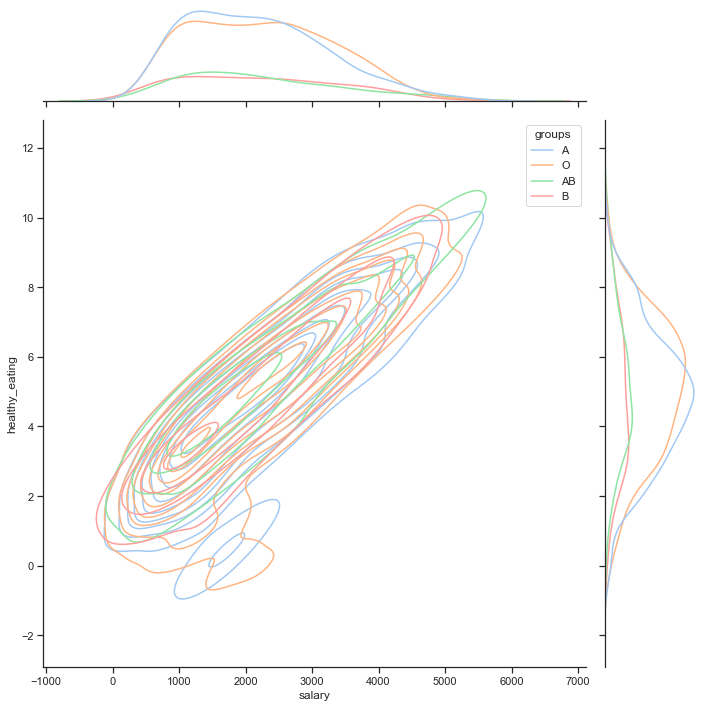

In [178]:
# Show the joint distribution using kernel density estimation
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=data,
    y=data.healthy_eating, x=data.salary, hue=data.groups,
    kind="kde",height=10,palette="pastel"
)

* people with A and O groups are active and eating healthy. This can be also due to the reason that number of people from A and O group are higher than AB and B group. 

### Building a model

In [179]:
data.corr()

,age,healthy_eating,active_lifestyle,salary
age,1.000000,-0.014969,0.148267,-0.072231
healthy_eating,-0.014969,1.000000,0.031613,0.858405
active_lifestyle,0.148267,0.031613,1.000000,-0.323575
salary,-0.072231,0.858405,-0.323575,1.000000


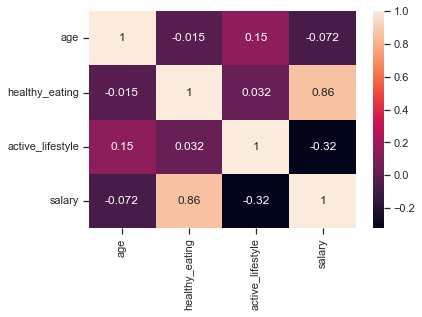

In [182]:
sns.heatmap(data.corr(),annot=True);

### Splitting the data into dependent and independent variables 

In [186]:
x = data.drop(columns=['salary'])
y = data[['salary']]

In [189]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=42)




In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

xtrain['groups'] = le.fit_transform(xtrain['groups'])
xtest['groups'] = le.transform(xtest['groups'])

In [191]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [192]:
train= LR.fit(xtrain,ytrain)
y_pred=LR.predict(xtest)

In [194]:
train.score(xtrain, ytrain)


0.8387567758231631

In [195]:
accuracy = LR.score(xtest, ytest)*100
print("Accuracy: {}".format(accuracy))

Accuracy: 90.32116743201172


#### We will check the distribution of our train and test data

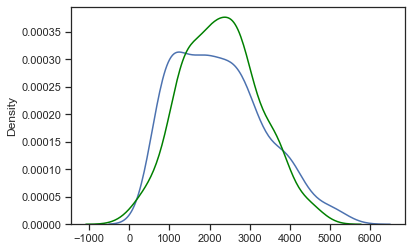

In [198]:
hist1 = ytest
hist2 = y_pred

from scipy.stats import norm

sns.distplot(hist1,color="b",hist=False, label='True Value');
sns.distplot(hist2,hist=False,color='green', label='Predicted Value');

#### Calculating Residuals

In [199]:
Residuals= ytest-y_pred

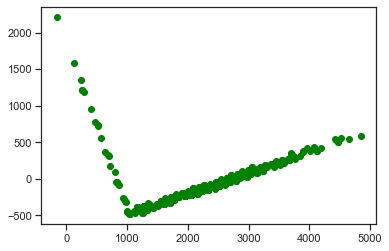

In [206]:
plt.scatter(y_pred,Residuals, color = 'green');

In [215]:
import statsmodels.api as sm 
x_train1=sm.add_constant(xtrain)
x_train1

,const,groups,age,healthy_eating,active_lifestyle
541,1.0,3,50,4,8
440,1.0,0,46,3,5
482,1.0,0,21,8,5
422,1.0,1,64,4,7
778,1.0,0,20,3,6
...,...,...,...,...,...
106,1.0,0,56,6,5
270,1.0,1,51,10,4
860,1.0,3,30,5,2
435,1.0,3,41,7,5


In [217]:
model=sm.OLS(ytrain,x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     903.8
Date:                Wed, 29 Dec 2021   Prob (F-statistic):          1.16e-273
Time:                        17:25:56   Log-Likelihood:                -5236.0
No. Observations:                 700   AIC:                         1.048e+04
Df Residuals:                     695   BIC:                         1.050e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              956.3788     77.974     12.265      0.000     803.286    1109.472
groups              14.6448     12.274      1.193      0.233      -9.454      38.744
age                  0.2172      1.227      0.177      0.860      -2.191       2.626
healthy_eating     454.6681      8.015     56.725      0.000     438.931     470.405
active_lifestyle  -175.4510      8.022    -21.871      0.000    -191.201    -159.701
==============================================================================
Omnibus:                      502.676   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6975.475
Skew:                           3.142   Prob(JB):                         0.00
Kurtosis:                      17.131   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality of Residuals

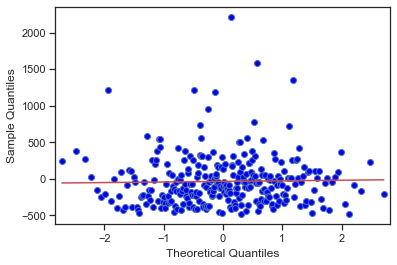

In [227]:
normality_plot=sm.qqplot(Residuals, line='r');

### Anderson Darling test

In [231]:
from scipy import stats
anderson= stats.anderson(model.resid,dist='norm')
anderson

AndersonResult(statistic=37.10794245464842, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### The residuals are not following a normal distribution

### Test for auto correlation - DURBIN WATSON TEST

In [218]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

2.108894292111427

### In Durbin Watson test the value should lie between 0 - 4. 
* 1.8 - 2.2 --> No auto correlation
### Hence the residuals are not autocorrelated

### Test to check Heteroscedasticity - BREUSCH PAGAN TEST

In [224]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]

### From the Breusch pagan test the p value is greater than 0.05, which means the variance of the residual is equal

### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<